In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fc, pc, tc = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_with_mapping(num_epochs=20, batch_size=20, learning_rate=0.001)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:181: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 1.8162875279784203
Epoch:1, Loss: 71.45732170663774
Epoch:2, Loss: 65.70991093952954
Epoch:3, Loss: 1009.5245429149061
Epoch:4, Loss: 201.6336252179402
Epoch:5, Loss: 43.70766225145077
Epoch:6, Loss: -16.015615312448013
Epoch:7, Loss: -27.59287679904518
Epoch:8, Loss: -33.84019925885164
Epoch:9, Loss: -65.5800168567752
Epoch:10, Loss: 269.88795363907803
Epoch:11, Loss: 66.99213510752676
Epoch:12, Loss: 13.038661206515547
Epoch:13, Loss: 423.57552696809205
Epoch:14, Loss: 88.07150016137965
Epoch:15, Loss: -47.173911325317604
Epoch:16, Loss: -20372.91393055276
Epoch:17, Loss: -4074.055269496279
Epoch:18, Loss: -805.3919730994378
Epoch:19, Loss: -167.47029290995548


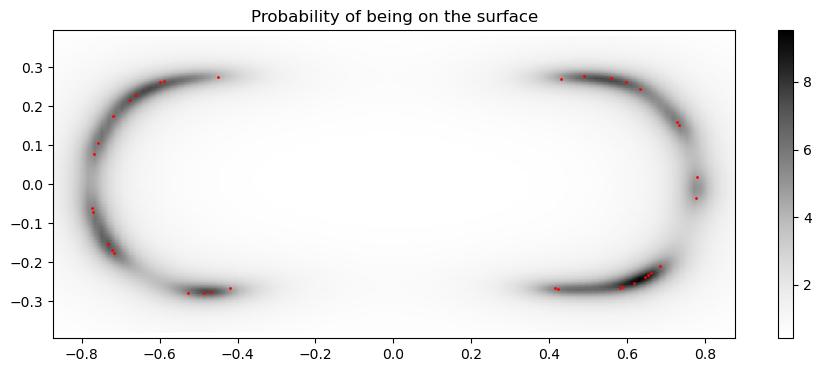

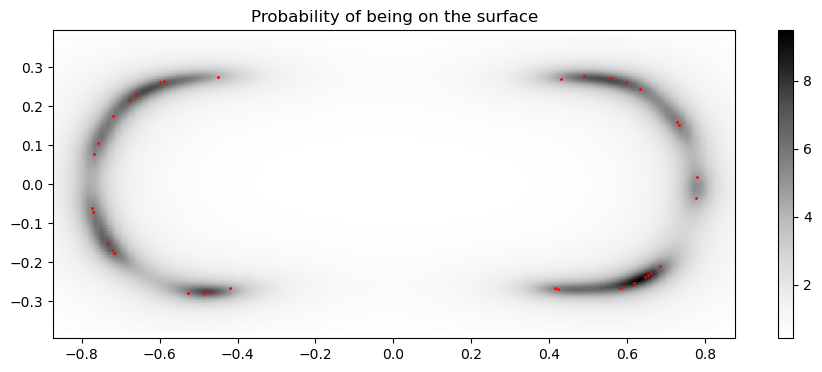

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[:2, :])

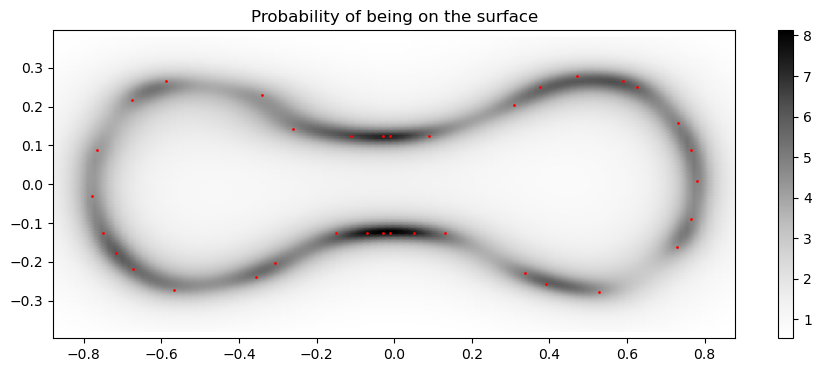

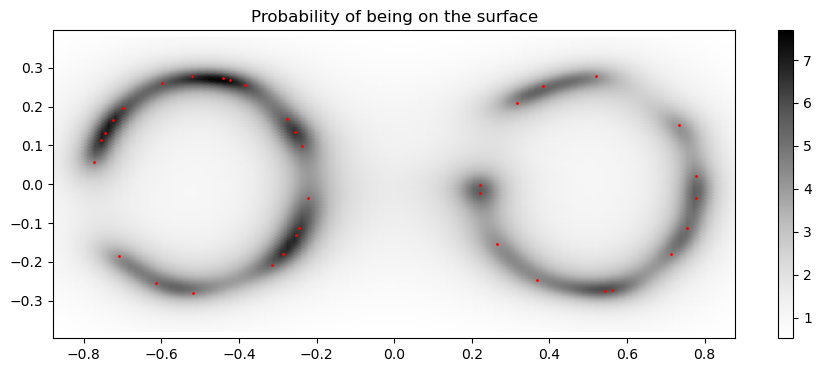

In [10]:
model.predict()